In [73]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

In [12]:
X_train = pd.read_csv('input.csv')
Y_train = pd.read_csv('labels.csv')
X_test = pd.read_csv('input_test.csv')
Y_test = pd.read_csv('labels_test.csv')

In [29]:
X_train = X_train.to_numpy().reshape(len(X_train), 100, 100, 3)
X_test = X_test.to_numpy().reshape(len(X_test), 100, 100, 3)
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [30]:
X_train.shape

(1999, 100, 100, 3)

In [34]:
Y_train.shape

(1999, 1)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [43]:
X_train[0].shape

(100, 100, 3)

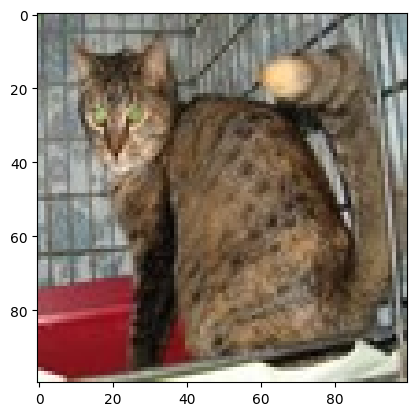

In [49]:
n = random.randint(0, len(X_train))
plt.imshow(X_train[n])

In [74]:
#model
model = Sequential()

model.add(Input(shape=(100,100,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 396ms/step - accuracy: 0.5046 - loss: 0.7586 - val_accuracy: 0.5890 - val_loss: 0.6917
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.5286 - loss: 0.6900 - val_accuracy: 0.6491 - val_loss: 0.6462
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.6201 - loss: 0.6529 - val_accuracy: 0.5614 - val_loss: 0.6792
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - accuracy: 0.6263 - loss: 0.6340 - val_accuracy: 0.6892 - val_loss: 0.6010
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6920 - loss: 0.5909 - val_accuracy: 0.6817 - val_loss: 0.5879


In [78]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6138 - loss: 0.6270


[0.5879234075546265, 0.6817042827606201]

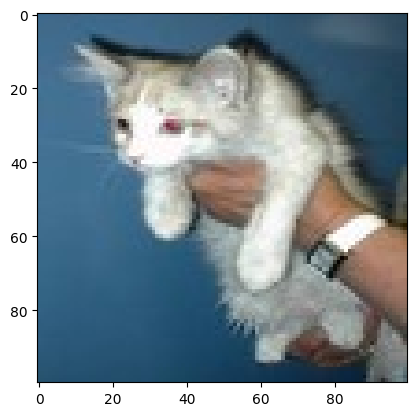

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Our model says it is a : cat


In [81]:
n = random.randint(0,len(Y_test))
plt.imshow(X_test[n])
plt.show()

y_pred = model.predict(X_test[n].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)

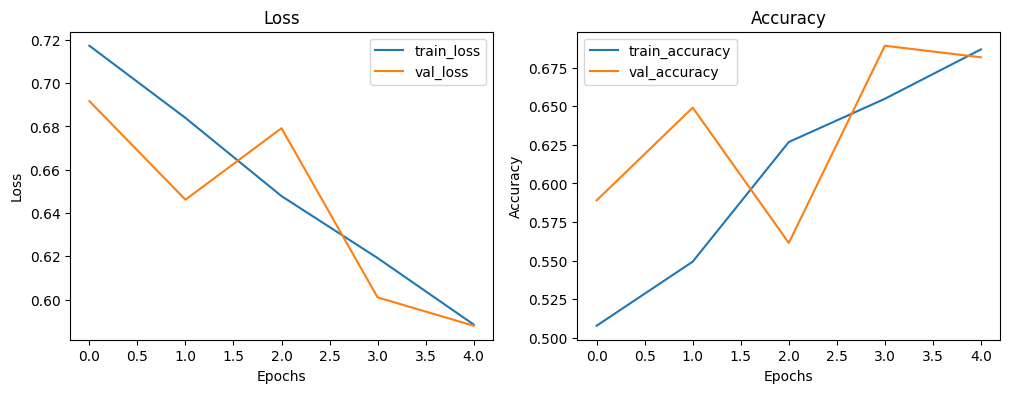

In [80]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
